<a href="https://colab.research.google.com/github/philip-papasavvas/ml_sandbox/blob/main/Load_data_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Example of reading in data using pyTorch, and getting used to handling tensors, data loaders, etc. And finally visualising the data**

This is taken from the pyTorch tutorials: https://pytorch.org/tutorials/recipes/recipes/loading_data_recipe.html

We will load in some data in pyTorch, and get used to the datasets it has to offer

In [1]:
pip install torchaudio

     |████████████████████████████████| 7.6MB 4.0MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [2]:
import torch
import torchaudio

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [8]:
torchaudio.datasets.YESNO(
    root='/usr/local/', # need to enter the path to where to download the dataset
    url = 'http://www.openslr.org/resources/1/waves_yesno.tar.gz',
    folder_in_archive='waves_yesno',
    download=True, 
    transform=None,
    target_transform=None
)

In [29]:
# Let's look at a datapoint in the YESNO dataset, which consists of 
# 60 recordings of an individidual saying yes or no in Hebrew.
# Each recording is eight (8) words long.
yesno_data_trainset = torchaudio.datasets.YESNO(root='./',
                                                download=True)

# pick the first datapoint to see an example of the data
n = 1 
waveform, sample_rate, labels = yesno_data_trainset[1]

In [30]:
print(f"Waveform: \n {waveform}")

Waveform: 
 tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -2.7466e-03,
         -3.6926e-03, -1.6174e-03]])


In [31]:
# we want to look at the size of the waveform/tensor above, 
# using pyTorch, we use the .size() or .shape method to do this
print(f"Waveform dimensions: {waveform.size()}")

Waveform dimensions: torch.Size([1, 54080])


In [32]:
print(f"Waveform dimensions: {waveform.shape}")

Waveform dimensions: torch.Size([1, 54080])


In [33]:
print(sample_rate)

8000


In [34]:
print(labels)

[0, 0, 0, 1, 0, 0, 0, 1]


As is customary, we will split the data into a "training" and "testing" dataset, so we can test the model on the "test" dataset after training it using the "training" dataset, to assess the model's performance.

In [25]:
data_load = torch.utils.data.DataLoader(yesno_data_trainset,
                                        batch_size=1,
                                        shuffle=True)

In [26]:
type(data_load)

torch.utils.data.dataloader.DataLoader

Iterate over the data, which is an iteratable after using data_loader. The data is converted to tensors containing the waveform, sample rate, and labels.

In [36]:
for data in data_load:
  print(f"Data: {data} \n")
  print(f"Waveform: {data[0]} \n"
        f"Sample rate: {data[1]} \n"
        f"Labels: {data[2]}")
  break

Data: [tensor([[[-0.0008, -0.0009, -0.0010,  ...,  0.0053,  0.0047,  0.0034]]]), tensor([8000]), [tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([1]), tensor([0]), tensor([0])]] 

Waveform: tensor([[[-0.0008, -0.0009, -0.0010,  ...,  0.0053,  0.0047,  0.0034]]]) 
Sample rate: tensor([8000]) 
Labels: [tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([1]), tensor([0]), tensor([0])]


Visualise the data

In [37]:
import matplotlib.pyplot as plt

print(data[0][0].numpy()) # converted from tensor to numpy

[[-0.00082397 -0.00094604 -0.0010376  ...  0.00527954  0.00466919
   0.00335693]]


Let's plot what the waveform looks like

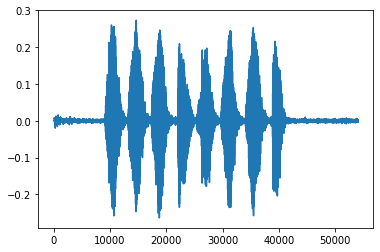

In [38]:
plt.figure()
plt.plot(waveform.t().numpy())